In [3]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import math as Math

In [18]:
def f_g_s(x1, x2, g, s):

    # Initialisation de la somme
    res = 0

    # On boucle sur tout les points de g et s, pour calculer la somme
    for i in range(len(g)):
        res += np.exp(-np.linalg.norm((x1 - g[i][0], x2 - g[i][1])) ** 2 / (2 * s[i]**2))
    return res
# def f_g_s(x,g,s):
#     f = 0
#     for i in range(len(g)):
#         f+=Math.exp(-la.norm(x-g[i])/(2*s[i]**2))
#     return f

def intens(x1,x2,g,s):
    Y = []
    for i in range(len(x1)):
        if f_g_s(x1[i],x2[i],g,s) > 1/2:
            Y+=[1]
        else:
            Y+=[-1]
    return np.array(Y)

    

def ensalea(n,a, flag=0):
    g = np.random.uniform(.2,.8,size=(n,2))
    # print("****",g.shape)
    s = np.random.uniform(0,a,n)
    # print("----",s.shape)
    if flag == 1:
        plt.figure(figsize=(8,8))
        
        # On génère 50 points dans l'intervalle [0, 1]
        X1 = np.linspace(0, 1, 50) 

        # On boucle sur tout de [0, 1]²
        for i in range(50):
            for j in range(50):

                # Si le point est dans A
                if f_g_s(X1[i], X1[j], g, s) > 0.5:

                    # On affiche ce point
                    plt.plot(X1[i], X1[j], 'mo', markersize=3)
        plt.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], 'r')
    return g,s

def echant(l,g,s):
    x1,x2 = np.random.uniform(0,1,l), np.random.uniform(0,1,l)
    y = intens(x1,x2,g,s)
        
    return x1,x2,y

def plot_echant(X1, X2, Y):
    for i in range(len(Y)):
        if Y[i] == 1:
            plt.plot(X1[i], X2[i], 'o', color='blue')
        else:
            plt.plot(X1[i], X2[i], 'x', color='blue')




(array([[0.36025677, 0.31150661],
        [0.2306529 , 0.58057703],
        [0.57341937, 0.60716974],
        [0.3627524 , 0.57115479]]),
 array([0.29720954, 0.16460009, 0.10594835, 0.21850497]))

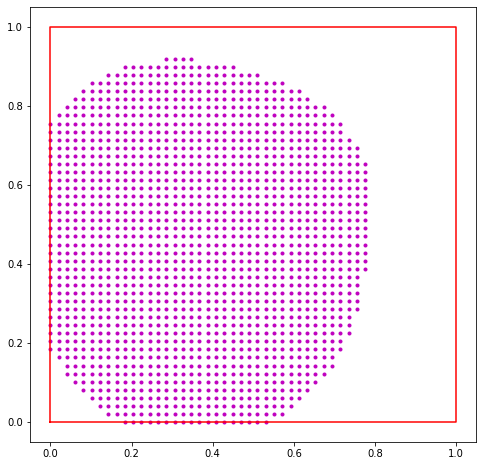

In [15]:
ensalea(4,.3,1)

In [16]:
def l_coeffs(X1, X2, Y, p, i, j):
    
    # Initialisation des valeurs de l^+ et l^-
    l_plus = 0
    l_moins = 0

    for x1, x2, y in zip(X1, X2, Y):

        # On regarde si le point est dans le carreaux c_ij
        if ((i-1) / p <= x1 <= i / p):
            if ((j-1)/p <= x2 <= j / p):

                # Si sa classe est 1 -> on est dans A
                if y == 1:
                    # On incrémente l^+
                    l_plus += 1
                # Si sa classe est -1 -> on est hors de A
                else:

                    # On incrémente l^-
                    l_moins += 1
    return l_plus, l_moins


def estens(X1, X2, Y, p, l):
    
    B = np.zeros((p, p))

    Re_plus = 0 # Le nombre de points classés hors de A alors que c_ij est dans A
    Re_moins = 0 # Le nombre de points classés dans A alors que c_ij est hors de A

    for j in range(p):
        for i in range(p):

            l_plus, l_moins = l_coeffs(X1, X2, Y, p, i+1, j+1)

            # Si l^+ > l^- -> le carreau c_ij est dans A
            if l_plus >= l_moins:
                B[i, j] = 1

                # On incrémente le risque empirique
                # On compte le nombre de points qui n'ont pas été compté dans A
                Re_plus += l_moins

            # Sinon, on laisse b_ij à 0
            else:

                # On compte le nombre de points qui ont été compté dans A
                Re_moins += l_plus

    # On calcule le risque empirique  la moyenne des valeurs Re+ et Re-
    Re = (Re_plus + Re_moins) / l

    return B, Re

def plot_B(B, p):
    
    c = 1/(2*p)

    # On affiche le quadrillage c_ij
    for k in range(p):
        plt.plot([k/p, k/p], [0, 1], 'r')
        plt.plot([0, 1], [k/p, k/p], 'r')

    for i in range(p):
         for j in range(p):
            
            if B[i, j]==1:
                plt.plot(i/p + c, j/p + c, 'ro')

            else:
                plt.plot(i/p + c, j/p + c, 'rx')



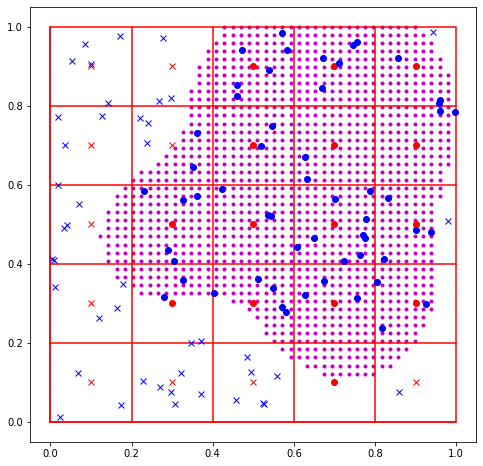

In [19]:
l = 100
p = 5
n = 4
a = .3

g, s = ensalea(n, a, flag=1)

X1, X2, Y = echant(l, g, s)

B, Re = estens(X1, X2, Y, p, l)
plot_B(B, p)

# On affiche le l-échantillon d'apprentissage aléatoire
plot_echant(X1, X2, Y)

In [20]:
#calcul de R_test
def testens(B, m, g, s):
    X1, X2, Y = echant(m, g, s)
    p = B.shape[0]
    res = 0
    for x1, x2, y in zip(X1, X2, Y):

        i = int(x1*p)
        j = int(x2*p)

        if B[i, j]==1:
            if y==-1:
                res += 1
        else:
            if y==1:
                res += 1

    return res / m

In [22]:
#Calcul de m.
eta = .05
eps = .02
m0 = int(Math.ceil(-Math.log(eta/2)/(2*eps**2)))#formule du sujet
testens(B,m0,g,s)

   

0.1476582827406765

In [23]:
def display(L=[100, 500, 1000, 10000], P=[2, 3, 6, 7, 10, 15, 20, 30, 40, 50, 60]):

    plt.figure(figsize=(15, 10))
    couleurs = ['r', 'b', 'g', 'm']

    for i, l in enumerate(L):

        Re_list = []
        R_test_list = []

        X1, X2, Y = echant(l, g, s)
       
        for p in P:
            
            # Risque empirique
            B, Re = estens(X1, X2, Y, p, l)
            Re_list.append(Re)

            # Risque de test
            R_test = testens(B, m0, g, s)
            R_test_list.append(R_test)

        # Affichage des courbes
        plt.plot(P, Re_list, color=couleurs[i], marker='o', linestyle='dashed', label='Empirique pour l = '+str(l))
        plt.plot(P, R_test_list, color=couleurs[i], marker='o', label='Test pour l = '+str(l))
        plt.legend(loc='upper left')

        print('Pour l = ' + str(l) + ' le p optimal est = ', P[np.argmin(R_test_list)])

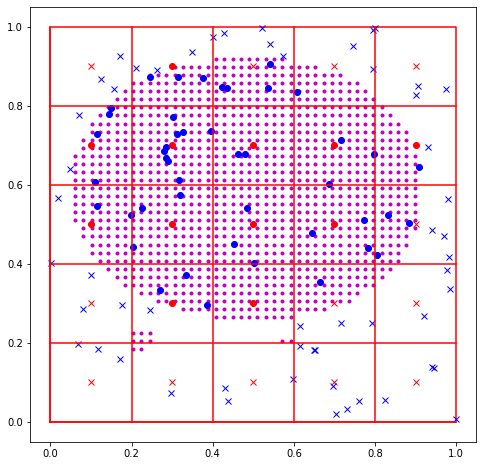

Pour l = 100 le p optimal est =  6
Pour l = 500 le p optimal est =  10
Pour l = 1000 le p optimal est =  15
Pour l = 10000 le p optimal est =  40


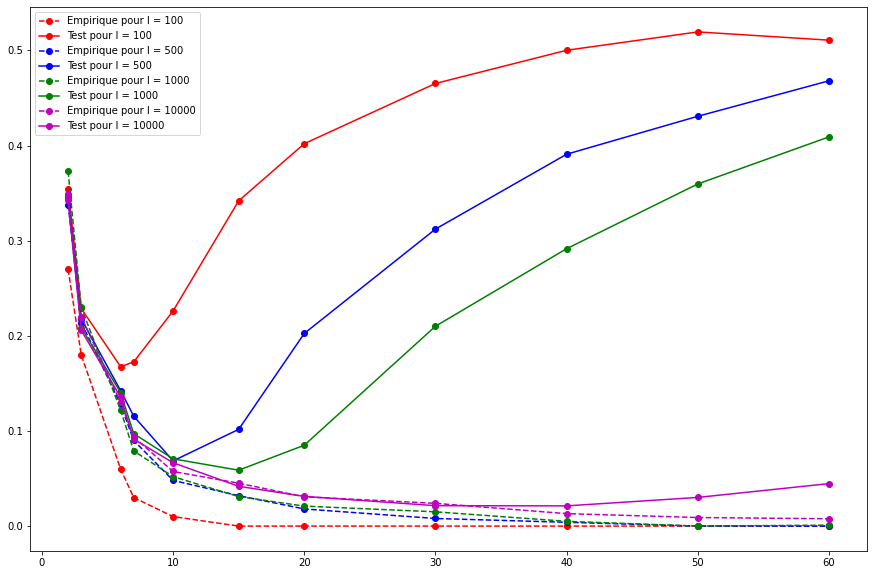

In [25]:
l = 100
p = 5
n = 4
a = .3
[g,s] = ensalea(n,a,1)
x1,x2,y = echant(l,g,s)
plot_echant(x1,x2,y)
B,Re = estens(x1,x2,y,p,l)
plot_B(B,p)
plt.show()
R_test = testens(B,m0,g,s)
display()
